In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas
from phe import *
from phe import map_data as phe_map_data
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

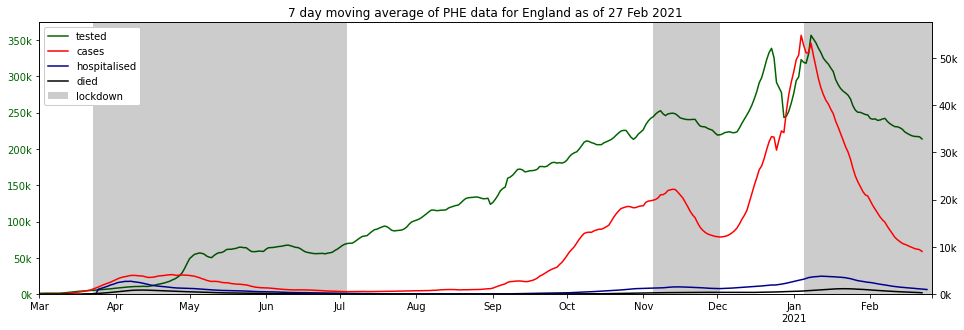

In [2]:
plot_summary(earliest_date='2020-03-01')

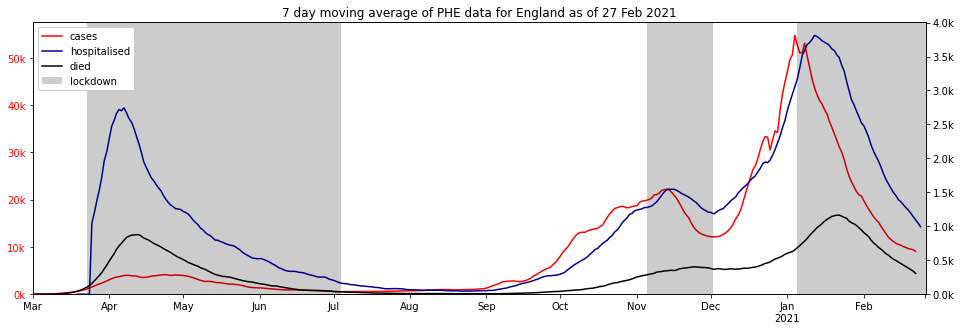

In [3]:
plot_summary(earliest_date='2020-03-01', left_series=(s.new_cases_sum,), 
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter)

,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,574963.0,16679881.0,16104918.0,56286961,1.021485,28.612165,70.366350
1,Northern Ireland,N92000002,32616.0,515678.0,483062.0,1893667,1.722373,25.509342,72.768285
2,Scotland,S92000003,72178.0,1570153.0,1497975.0,5463300,1.321143,27.418868,71.259989
3,Wales,W92000004,89053.0,916336.0,827283.0,3152879,2.824498,26.238971,70.936531


'partial: 19,682,048'

'full: 768,810'

66796807

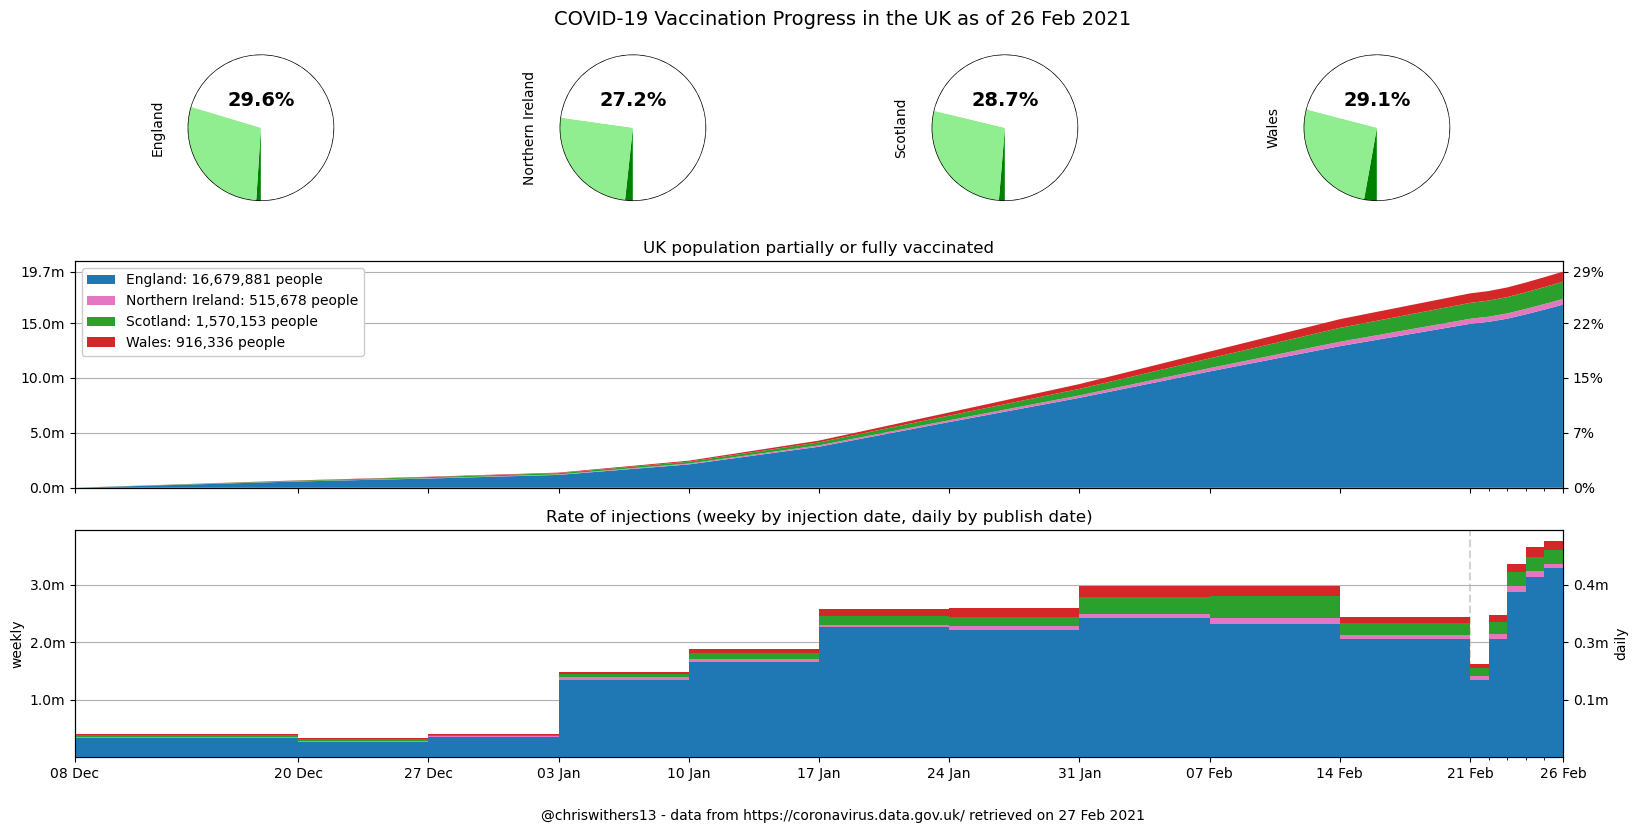

In [4]:
results = vaccination_dashboard()
display(results, f"partial: {results['any'].sum():,.0f}", f"full: {results['full'].sum():,.0f}", results['population'].sum())

In [5]:
vaccination_changes()

,,First Dose (New),Second Dose (New),Complete (New),First Dose (Total),Second Dose (Total),Complete (Total)
,,,,,,,
England,26 Feb 21,"+452,777","+16,226","+16,226","+16,679,881","+574,963","+574,963"
Northern Ireland,26 Feb 21,"+10,490",+718,+718,"+515,678","+32,616","+32,616"
Scotland,26 Feb 21,"+27,224","+6,838","+6,838","+1,570,153","+72,178","+72,178"
Wales,26 Feb 21,"+14,002","+8,991","+8,991","+916,336","+89,053","+89,053"


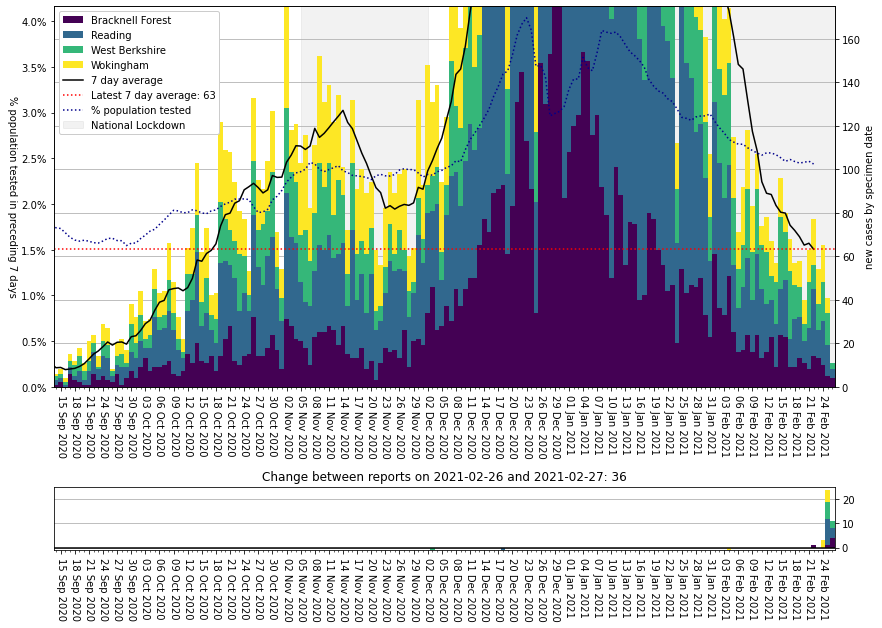

In [6]:
plot_areas(for_date, areas=my_areas, earliest='2020-09-14', ylim=175)

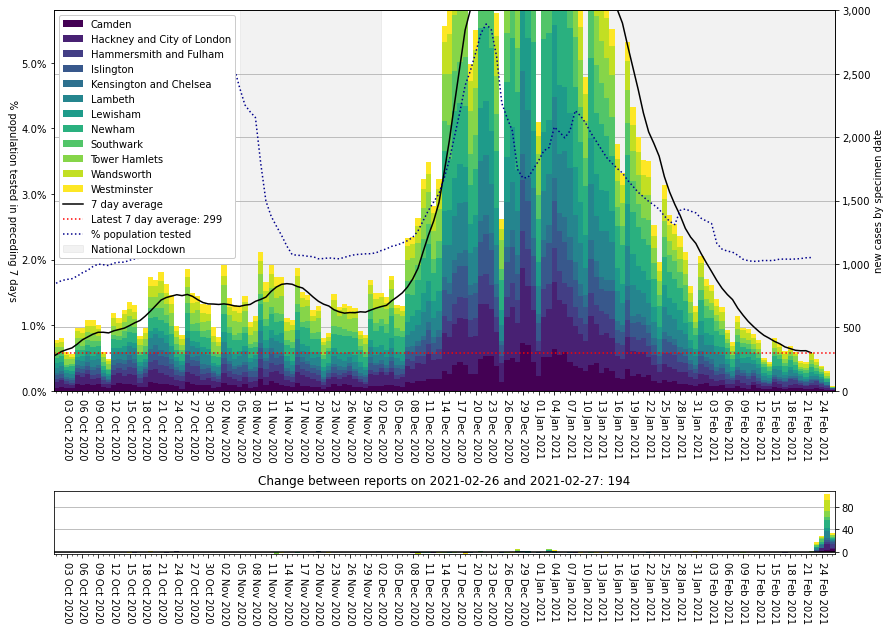

In [7]:
plot_areas(for_date, areas=london_areas, ylim=3_000)

In [8]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [9]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E07000150,Corby,220.166717,159.0,2021-02-26
E06000016,Leicester,182.652785,647.0,2021-02-26
E07000010,Fenland,179.675994,183.0,2021-02-26
E06000031,Peterborough,172.056620,348.0,2021-02-26
E07000134,North West Leicestershire,171.796431,178.0,2021-02-26
E08000028,Sandwell,164.104125,539.0,2021-02-26
E07000140,South Holland,163.125270,155.0,2021-02-26
E07000236,Redditch,163.028817,139.0,2021-02-26
E07000170,Ashfield,161.822417,207.0,2021-02-26


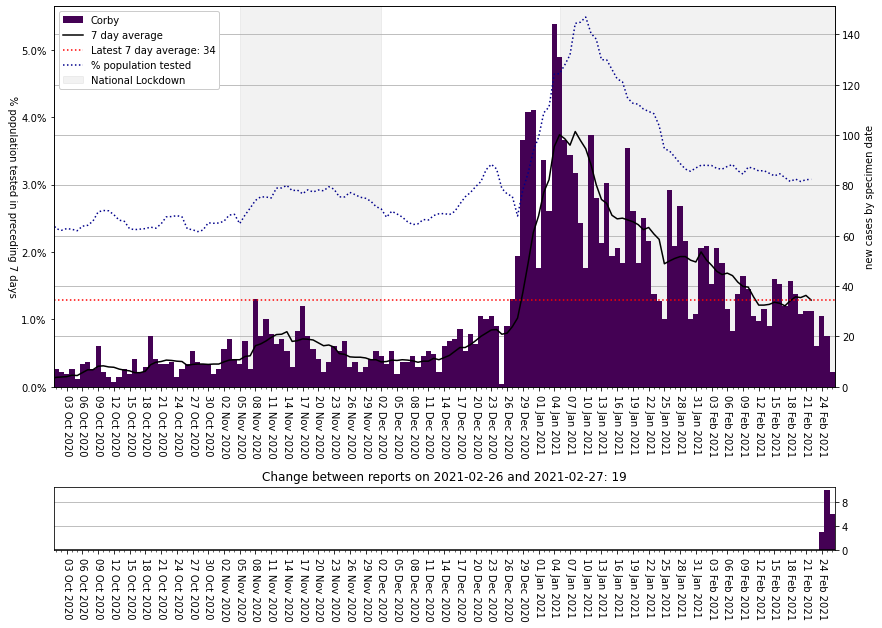

In [10]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [11]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000025,Birmingham,109.036833,1245.0,2021-02-26
E08000035,Leeds,118.264264,938.0,2021-02-26
E08000032,Bradford,150.988558,815.0,2021-02-26
S12000049,Glasgow City,110.247662,698.0,2021-02-26
E06000016,Leicester,182.652785,647.0,2021-02-26
E08000003,Manchester,115.400338,638.0,2021-02-26
E08000034,Kirklees,134.838001,593.0,2021-02-26
E08000019,Sheffield,100.538084,588.0,2021-02-26
E08000028,Sandwell,164.104125,539.0,2021-02-26


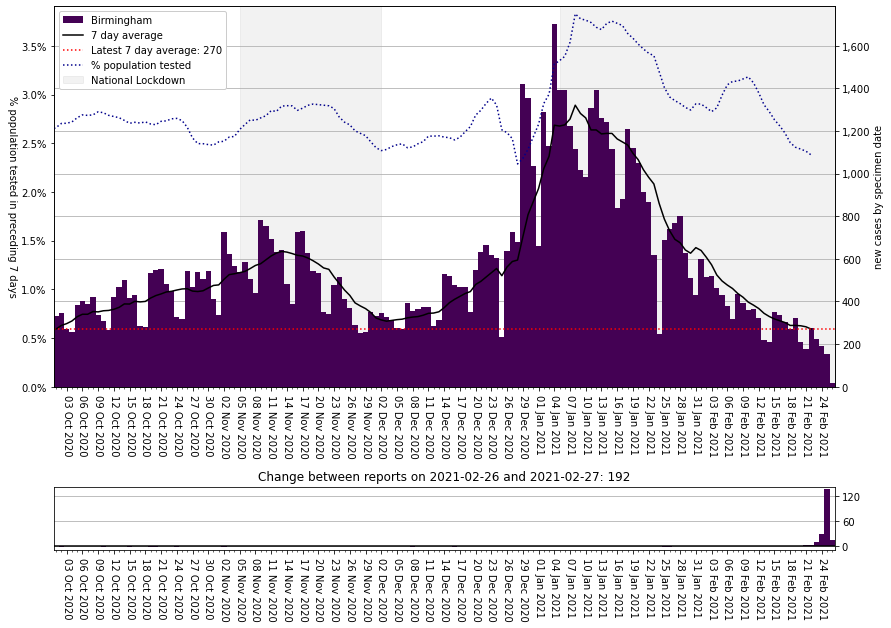

In [12]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [13]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 1.3
phe_max = 0.30

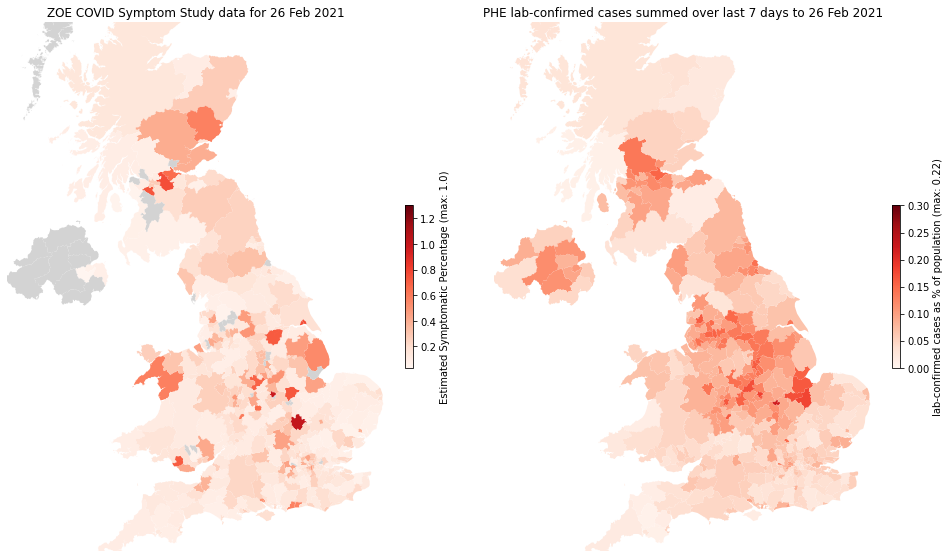

In [14]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [15]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...

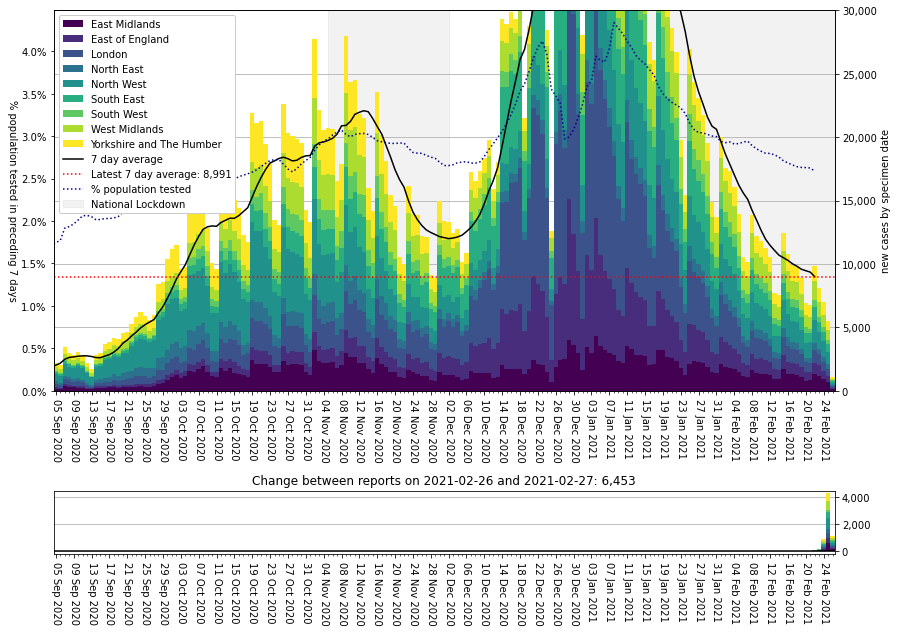

In [16]:
plot_areas(for_date, area_type=region, ylim=30_000, earliest='2020-09-05')

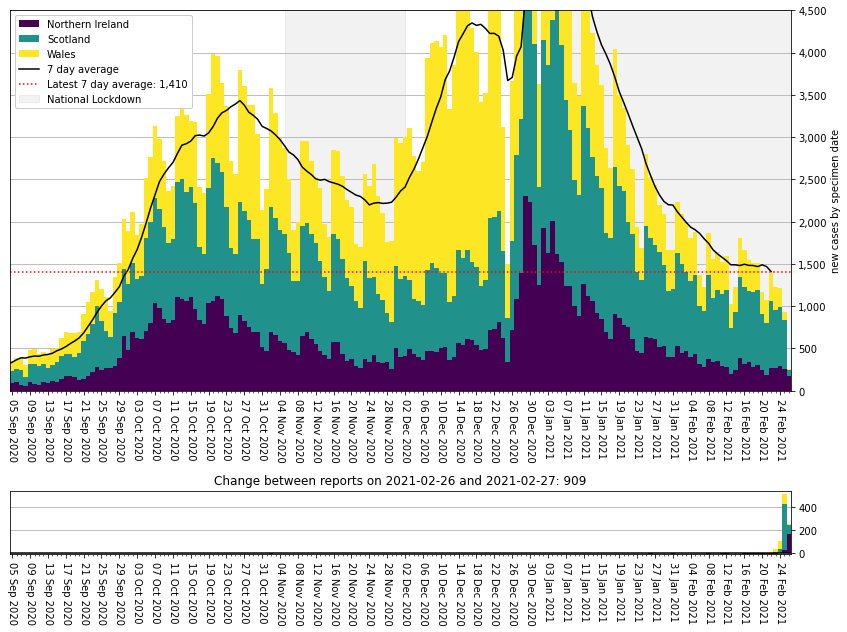

In [17]:
plot_areas(for_date, 'cases_devolved', ylim=4_500, diff_ylims=None, earliest='2020-09-05')